<a href="https://colab.research.google.com/github/cristiane88/Desafio-final-ShePY/blob/main/ShePY_DESAFIO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [566]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


# **Mercado financeiro no Brasil, como está?**
## Essa análise explora o perfil de pessoas físicas e o seu comportamento ao longos dos anos.
![](https://investidorsardinha.r7.com/wp-content/uploads/2020/08/b3-a-bolsa-de-valores-brasileira-o-que-e-como-surgiu-e-funcionamento-10-1024x538.jpg)





 - Quem mais investe no Brasil? Homem ou Mulher?
 - Qual a faixa etária que mais investe?
 - Onde estão essas pessoas?
 - O brasileiro gosta de investir em renda variável?
  - *Bora descobrir algumas curiosidades sobre esse mercado não tão conhecido!!!* 




In [567]:
df_est = pd.read_csv('/content/Perfil Investidores Estado_Mai2021.csv', encoding="ISO-8859-1", sep = '|')

df = pd.read_csv('/content/Perfil Investidores Faixa Etária_Mai2021.csv', encoding="ISO-8859-1", sep = '|')

df_cad = pd.read_csv('/content/Perfil Investidores Gênero_Mai2021.csv', encoding="ISO-8859-1", sep = '|')


In [568]:
df

,20210604,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Contas,NaN,NaN,Valor (R$ Bilhões),NaN,NaN,NaN
1,Perfil PF por Faixa Etária,HOMENS,MULHERES,TOTAL,HOMENS,MULHERES,TOTAL,%
2,Até 15 anos,10125,8092,18217,0.36,0.31,0.67,0.13
3,De 16 a 25 anos,324655,103932,428587,3.76,1.42,5.18,0.97
4,De 26 a 35 anos,872623,330281,1202904,33.20,9.35,42.55,7.98
5,De 36 a 45 anos,769883,269855,1039738,76.45,17.08,93.54,17.54
6,De 46 a 55 anos,343098,136201,479299,82.52,20.18,102.70,19.26
7,De 56 a 65 anos,222326,106010,328336,90.25,26.08,116.33,21.82
8,Maior de 66 anos,164621,76501,241122,134.33,37.88,172.21,32.30
9,TOTAL,2707331,1030872,3738203,420.87,112.30,533.18,NaN


# Formatação dos dados

In [569]:
df.columns = df.iloc[1]
df.drop([0,1], inplace=True)
df.drop(9,inplace=True)


In [570]:
cols = ['Perfil PF por Faixa Etária',	'HOMENS',	'MULHERES',	'TOTAL',	'HOMENS_BI',	'MULHERES_BI',	'TOTAL_BI',	'%']
df.columns=cols
df

,Perfil PF por Faixa Etária,HOMENS,MULHERES,TOTAL,HOMENS_BI,MULHERES_BI,TOTAL_BI,%
2,Até 15 anos,10125,8092,18217,0.36,0.31,0.67,0.13
3,De 16 a 25 anos,324655,103932,428587,3.76,1.42,5.18,0.97
4,De 26 a 35 anos,872623,330281,1202904,33.20,9.35,42.55,7.98
5,De 36 a 45 anos,769883,269855,1039738,76.45,17.08,93.54,17.54
6,De 46 a 55 anos,343098,136201,479299,82.52,20.18,102.70,19.26
7,De 56 a 65 anos,222326,106010,328336,90.25,26.08,116.33,21.82
8,Maior de 66 anos,164621,76501,241122,134.33,37.88,172.21,32.30


In [571]:
df[['HOMENS', 'MULHERES', 'TOTAL','HOMENS_BI', 'MULHERES_BI', 'TOTAL_BI', '%']]=df[['HOMENS', 'MULHERES', 'TOTAL','HOMENS_BI', 'MULHERES_BI', 'TOTAL_BI', '%']].astype(float)

In [572]:
df.dtypes

Perfil PF por Faixa Etária     object
HOMENS                        float64
MULHERES                      float64
TOTAL                         float64
HOMENS_BI                     float64
MULHERES_BI                   float64
TOTAL_BI                      float64
%                             float64
dtype: object

In [573]:

df[['HOMENS', 'MULHERES', 'TOTAL']]=df[['HOMENS', 'MULHERES', 'TOTAL']].apply(lambda x:x/1000)

In [574]:
df

,Perfil PF por Faixa Etária,HOMENS,MULHERES,TOTAL,HOMENS_BI,MULHERES_BI,TOTAL_BI,%
2,Até 15 anos,10.125,8.092,18.217,0.36,0.31,0.67,0.13
3,De 16 a 25 anos,324.655,103.932,428.587,3.76,1.42,5.18,0.97
4,De 26 a 35 anos,872.623,330.281,1202.904,33.20,9.35,42.55,7.98
5,De 36 a 45 anos,769.883,269.855,1039.738,76.45,17.08,93.54,17.54
6,De 46 a 55 anos,343.098,136.201,479.299,82.52,20.18,102.70,19.26
7,De 56 a 65 anos,222.326,106.010,328.336,90.25,26.08,116.33,21.82
8,Maior de 66 anos,164.621,76.501,241.122,134.33,37.88,172.21,32.30


In [575]:
lista = df['Perfil PF por Faixa Etária'].to_list()



In [576]:
df_sexo = df[['HOMENS_BI', 'MULHERES_BI', 'TOTAL_BI']].copy()
cols = ['HOMENS','MULHERES','TOTAL']
df_sexo.columns=cols
df_sexo

,HOMENS,MULHERES,TOTAL
2,0.36,0.31,0.67
3,3.76,1.42,5.18
4,33.20,9.35,42.55
5,76.45,17.08,93.54
6,82.52,20.18,102.70
7,90.25,26.08,116.33
8,134.33,37.88,172.21


# Investimento por faixa etária




-  **Qual a distribuição de investidores por sexo e o volume financeiro?**

---





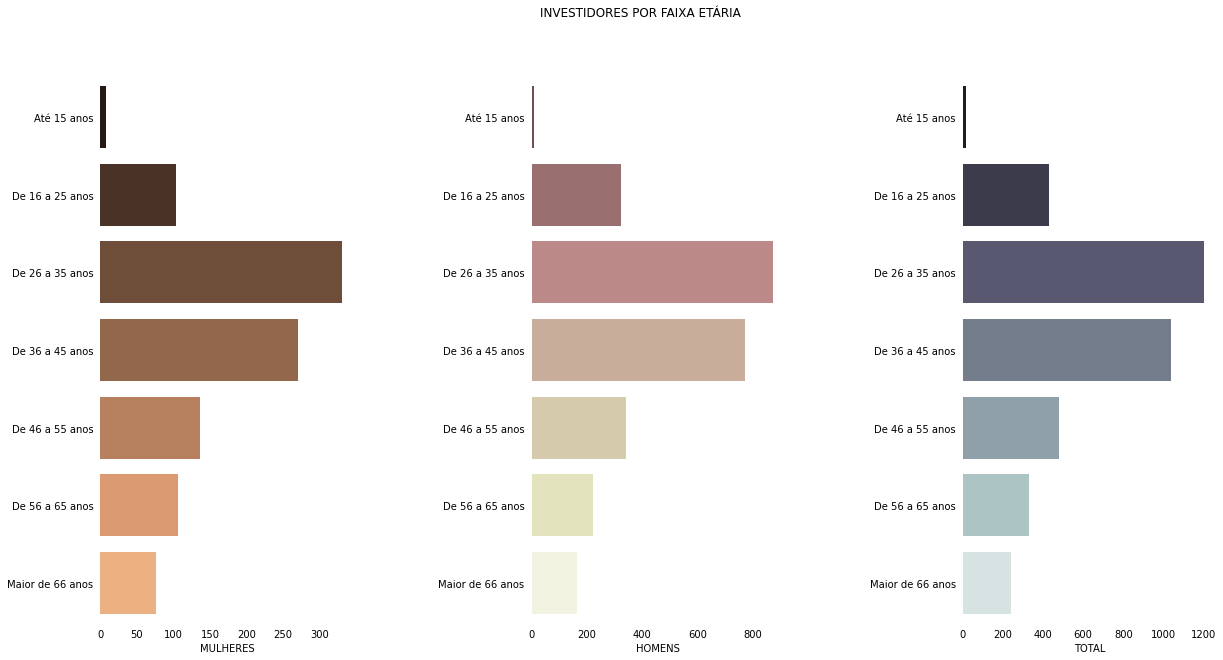

In [577]:
rc_params = {'axes.spines.top': False,
              'axes.spines.right': False,
              'axes.spines.bottom':False,
              'axes.spines.left':False,
              'xtick.bottom':False,
              'axes.titlepad':False,
              'ytick.left':False,}

with plt.rc_context(rc_params):
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10)) 

  sns.barplot(x='TOTAL', 
              y=lista,
              data=df, 
              ax=ax[2],
              palette = 'bone')
  

  sns.barplot(x='HOMENS',              
            y=lista,
            data=df,
            ax=ax[1],
            palette = 'pink')

  sns.barplot(x='MULHERES',              
              y=lista,
              data=df,
              ax=ax[0],
              palette = 'copper')
  plt.suptitle('INVESTIDORES POR FAIXA ETÁRIA')
  plt.subplots_adjust(wspace= 0.7)

 - **Com as dados apresentados é possível verificar fácilmente que a bolsa 
   brasileira é composta em sua maioria pela faixa etária de 26 à 35 anos,   sendo os homens predominante em todas elas.**


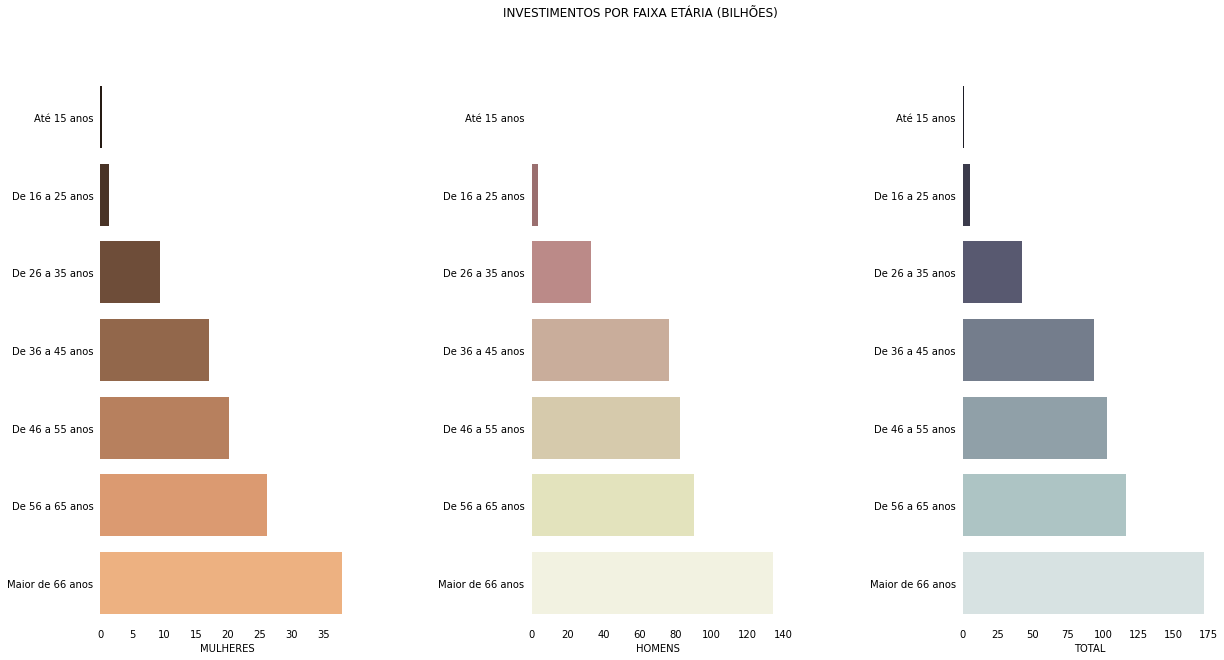

In [578]:
rc_params = {'axes.spines.top': False,
              'axes.spines.right': False,
              'axes.spines.bottom':False,
              'axes.spines.left':False,
              'xtick.bottom':False,
              'axes.titlepad':False,
              'ytick.left':False,}

with plt.rc_context(rc_params):
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10)) 

  sns.barplot(x='MULHERES', 
              y=lista,
              data=df_sexo, 
              ax=ax[0],
              palette = 'copper')
  

  sns.barplot(x='HOMENS',              
            y=lista,
            data=df_sexo,
            ax=ax[1],
            palette = 'pink')

  sns.barplot(x='TOTAL',              
              y=lista,
              data=df_sexo,
              ax=ax[2],
              palette = 'bone')
  plt.suptitle('INVESTIMENTOS POR FAIXA ETÁRIA (BILHÕES)')
  plt.subplots_adjust(wspace= 0.7)

**A informação anterior mostra que a maioria dos investidores estão na faixa etária de 26 à 35 anos, porém não essa faixa que garante o volume financeiro para o mercado, por mais que as pessoas maiores de 66 anos sejam uma parcela menor em quantidade, porém são eles que detém o maior volume em bilhões de reais**

# Formatação dos dados

In [579]:
df_est = pd.read_csv('/content/Perfil Investidores Estado_Mai2021.csv', encoding="ISO-8859-1", sep = '|')
df_est

,20210604,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Contas,NaN,NaN,Valor (R$ Bilhões),NaN,NaN,NaN
1,Estado,HOMENS,MULHERES,TOTAL,HOMENS,MULHERES,TOTAL,%
2,SP,1024076,408558,1432634,200.29,53.71,254.00,47.64
3,RJ,276011,111167,387178,58.02,20.29,78.31,14.69
4,MG,272111,100437,372548,42.72,7.38,50.11,9.40
5,RS,157018,53588,210606,21.83,6.68,28.51,5.35
6,PR,175471,61889,237360,20.97,5.03,26.00,4.88
7,SC,137005,46028,183033,15.23,4.11,19.34,3.63
8,DF,87148,37219,124367,10.74,2.51,13.25,2.48
9,BA,88646,34356,123002,9.01,2.24,11.25,2.11


In [580]:
df_est.columns = df_est.iloc[1]

df_est.drop([0,1], inplace=True)

df_est



1,Estado,HOMENS,MULHERES,TOTAL,HOMENS,MULHERES,TOTAL,%
2,SP,1024076,408558,1432634,200.29,53.71,254.00,47.64
3,RJ,276011,111167,387178,58.02,20.29,78.31,14.69
4,MG,272111,100437,372548,42.72,7.38,50.11,9.40
5,RS,157018,53588,210606,21.83,6.68,28.51,5.35
6,PR,175471,61889,237360,20.97,5.03,26.00,4.88
7,SC,137005,46028,183033,15.23,4.11,19.34,3.63
8,DF,87148,37219,124367,10.74,2.51,13.25,2.48
9,BA,88646,34356,123002,9.01,2.24,11.25,2.11
10,CE,54477,19249,73726,6.76,1.36,8.13,1.52
11,ES,56728,19850,76578,5.81,1.15,6.96,1.31


In [581]:
df_est = df_est.drop(29)
df_est

1,Estado,HOMENS,MULHERES,TOTAL,HOMENS,MULHERES,TOTAL,%
2,SP,1024076,408558,1432634,200.29,53.71,254.00,47.64
3,RJ,276011,111167,387178,58.02,20.29,78.31,14.69
4,MG,272111,100437,372548,42.72,7.38,50.11,9.40
5,RS,157018,53588,210606,21.83,6.68,28.51,5.35
6,PR,175471,61889,237360,20.97,5.03,26.00,4.88
7,SC,137005,46028,183033,15.23,4.11,19.34,3.63
8,DF,87148,37219,124367,10.74,2.51,13.25,2.48
9,BA,88646,34356,123002,9.01,2.24,11.25,2.11
10,CE,54477,19249,73726,6.76,1.36,8.13,1.52
11,ES,56728,19850,76578,5.81,1.15,6.96,1.31


In [582]:
cols = ['Estado',	'HOMENS',	'MULHERES',	'TOTAL',	'HOMENS_BI',	'MULHERES_BI',	'TOTAL_BI',	'%']
df_est.columns=cols
df_est

,Estado,HOMENS,MULHERES,TOTAL,HOMENS_BI,MULHERES_BI,TOTAL_BI,%
2,SP,1024076,408558,1432634,200.29,53.71,254.00,47.64
3,RJ,276011,111167,387178,58.02,20.29,78.31,14.69
4,MG,272111,100437,372548,42.72,7.38,50.11,9.40
5,RS,157018,53588,210606,21.83,6.68,28.51,5.35
6,PR,175471,61889,237360,20.97,5.03,26.00,4.88
7,SC,137005,46028,183033,15.23,4.11,19.34,3.63
8,DF,87148,37219,124367,10.74,2.51,13.25,2.48
9,BA,88646,34356,123002,9.01,2.24,11.25,2.11
10,CE,54477,19249,73726,6.76,1.36,8.13,1.52
11,ES,56728,19850,76578,5.81,1.15,6.96,1.31


In [583]:
df_est[['HOMENS', 'MULHERES', 'TOTAL','HOMENS_BI', 'MULHERES_BI', 'TOTAL_BI', '%']]=df_est[['HOMENS', 'MULHERES', 'TOTAL','HOMENS_BI', 'MULHERES_BI', 'TOTAL_BI', '%']].astype(float)

In [584]:
df_est.dtypes

Estado          object
HOMENS         float64
MULHERES       float64
TOTAL          float64
HOMENS_BI      float64
MULHERES_BI    float64
TOTAL_BI       float64
%              float64
dtype: object

In [585]:
df_est.shape

(27, 8)

In [586]:
#MAIS CPFS POR ESTADO
df_mais_CPF = df_est[['Estado','TOTAL']].sort_values(by='TOTAL',ascending=False)[:10].copy()
#Estados que mais investem
df_mais_BI = df_est[['Estado', 'TOTAL_BI']].sort_values(by='TOTAL_BI',ascending=False)[:10].copy()
'-=-=-=-=-=-=-=-=-=-=-=-=-=-'
#estados com menos cpf
df_menos_CPF = df_est[['Estado','TOTAL']].sort_values(by='TOTAL',ascending=True)[:10].copy()
#Estados com menos BI investidos
df_menos_BI = df_est[['Estado', 'TOTAL_BI']].sort_values(by='TOTAL_BI',ascending=True)[:10].copy()
df_menos_CPF['TOTAL'] = df_menos_CPF['TOTAL'].apply(lambda x: x/1000)


In [587]:

df_mais_CPF['TOTAL'] = df_mais_CPF['TOTAL'].apply(lambda x: x/100000)


In [588]:
df_mais_CPF

,Estado,TOTAL
2,SP,14.32634
3,RJ,3.87178
4,MG,3.72548
6,PR,2.37360
5,RS,2.10606
7,SC,1.83033
8,DF,1.24367
9,BA,1.23002
13,GO,0.90905
12,PE,0.85573


# Investidores por região 

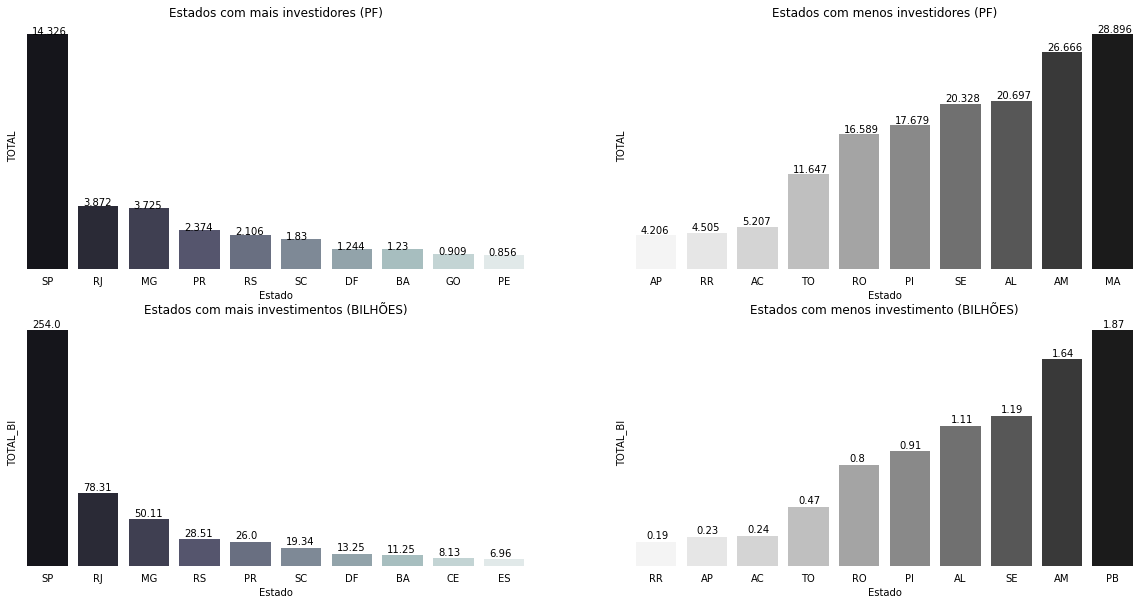

In [589]:
rc_params = {'axes.spines.top': False,
              'axes.spines.right': False,
              'axes.spines.bottom':False,
              'axes.spines.left':False,
              'xtick.bottom':False,
              'ytick.left':False,
              'ytick.labelleft':False}

with plt.rc_context(rc_params):
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10)) 

#__________________________________________________________________________________________________________________________________
  
  sns.barplot(x='Estado',
              y= 'TOTAL',
              data=df_mais_CPF,
              palette='bone',
              ax=ax[0,0])
  ax[0,0].set_title('Estados com mais investidores (PF)')

  for desl_x, desl_y in enumerate(df_mais_CPF['TOTAL']):
    
    ax[0,0].text(desl_x - 0.3,
                 desl_y + 0.020,
                 str(round(desl_y, 3)),
                 fontsize = 10)

#__________________________________________________________________________________________________________________________________


  sns.barplot(x='Estado',
              y= 'TOTAL_BI',
              data=df_TOTAL_BI,
              palette='bone',
              ax=ax[1,0])
  ax[1,0].set_title('Estados com mais investimentos (BILHÕES)')

  for desl_x, desl_y in enumerate(df_TOTAL_BI['TOTAL_BI']):
    ax[1,0].text(desl_x - 0.3,
                 desl_y + 4,
                 str(round(desl_y, 3)),
                 fontsize = 10)
    
#__________________________________________________________________________________________________________________________________


  sns.barplot(x='Estado',
               y= 'TOTAL',
               data=df_menos_CPF,
               palette='Greys',
               ax=ax[0,1])
  ax[0,1].set_title('Estados com menos investidores (PF)')

  for desl_x, desl_y in enumerate(df_menos_CPF['TOTAL']):
    ax[0,1].text(desl_x - 0.3,
                 desl_y + 0.3,
                 str(round(desl_y, 3)),
                 fontsize = 10)
    
#__________________________________________________________________________________________________________________________________

  sns.barplot(x='Estado',
              y= 'TOTAL_BI',
              data=df_menos_BI,
              palette='Greys',
              ax=ax[1,1])
  ax[1,1].set_title('Estados com menos investimento (BILHÕES)')

  for desl_x, desl_y in enumerate(df_menos_BI['TOTAL_BI']):
    ax[1,1].text(desl_x - 0.2,
                 desl_y + 0.03,
                 str(round(desl_y, 3)),
                 fontsize = 10)
    

  


**A região sudeste predomina o top 10 com mais investidores e investimentos sendo liderado por São Paulo, Rio de Janeiro e Minas Gerais. Não é uma verdade o local com maior numero de investidores garantir o maior volume financeiro, alguns estados acabam alternando suas posições dependendo da análise.**

# Percentual de volume financeiro por estado


In [590]:
df_percent = df_est[['Estado', '%']].copy()


In [591]:
df_percent

,Estado,%
2,SP,47.64
3,RJ,14.69
4,MG,9.40
5,RS,5.35
6,PR,4.88
7,SC,3.63
8,DF,2.48
9,BA,2.11
10,CE,1.52
11,ES,1.31


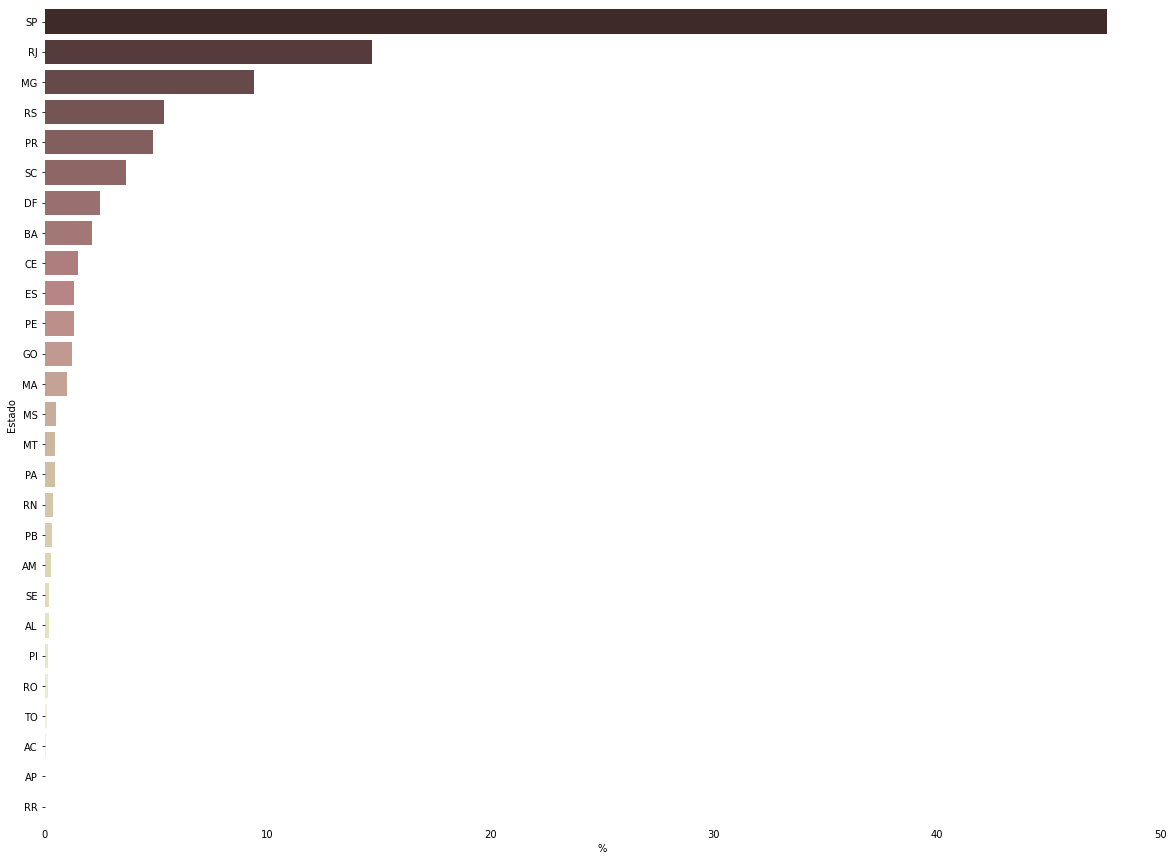

In [592]:
rc_params = {'axes.spines.top': False,
              'axes.spines.right': False,
              'axes.spines.bottom':False,
              'axes.spines.left':False,
              'xtick.bottom':False,}

with plt.rc_context(rc_params):
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 15)) 
  sns.barplot(x='%',
              y='Estado',
              #ax=ax[0,0],
              data=df_percent,
              palette='pink')
 

**São Paulo, Rio de Janeiro e Minas Gerais contabilizam 71,73% do volume financeiro de todo o Brasil relacionado a pessoas físicas**

# Formatação dos dados

In [593]:
df_cad

,20210604,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,Homens,NaN,Mulheres,NaN,Total PF
1,Ano,Qtd,%,Qtd,%,Qtd
2,2021,2707331,72.42,1030872,27.58,3738203
3,2020,2382966,73.76,847585,26.24,3230551
4,2019,1277424,76.67,388658,23.33,1666082
5,2018,634269,77.94,179511,22.06,813780
6,2017,478258,77.12,141855,22.88,620113
7,2016,434141,76.90,130387,23.10,564528
8,2015,424977,76.23,132545,23.77,557522
9,2014,426650,75.57,137912,24.43,564562


In [594]:
df_cad.columns = df_cad.iloc[1]
df_cad




1,Ano,Qtd,%,Qtd,%,Qtd
0,NaN,Homens,NaN,Mulheres,NaN,Total PF
1,Ano,Qtd,%,Qtd,%,Qtd
2,2021,2707331,72.42,1030872,27.58,3738203
3,2020,2382966,73.76,847585,26.24,3230551
4,2019,1277424,76.67,388658,23.33,1666082
5,2018,634269,77.94,179511,22.06,813780
6,2017,478258,77.12,141855,22.88,620113
7,2016,434141,76.90,130387,23.10,564528
8,2015,424977,76.23,132545,23.77,557522
9,2014,426650,75.57,137912,24.43,564562


In [595]:
df_cad.drop([0,1], inplace=True)
df_cad

1,Ano,Qtd,%,Qtd,%,Qtd
2,2021,2707331,72.42,1030872,27.58,3738203
3,2020,2382966,73.76,847585,26.24,3230551
4,2019,1277424,76.67,388658,23.33,1666082
5,2018,634269,77.94,179511,22.06,813780
6,2017,478258,77.12,141855,22.88,620113
7,2016,434141,76.90,130387,23.10,564528
8,2015,424977,76.23,132545,23.77,557522
9,2014,426650,75.57,137912,24.43,564562
10,2013,440727,74.79,148548,25.21,589275
11,2012,438600,74.70,148563,25.30,587163


In [596]:
df_cad.dropna()

1,Ano,Qtd,%,Qtd,%,Qtd
2,2021,2707331,72.42,1030872,27.58,3738203
3,2020,2382966,73.76,847585,26.24,3230551
4,2019,1277424,76.67,388658,23.33,1666082
5,2018,634269,77.94,179511,22.06,813780
6,2017,478258,77.12,141855,22.88,620113
7,2016,434141,76.90,130387,23.10,564528
8,2015,424977,76.23,132545,23.77,557522
9,2014,426650,75.57,137912,24.43,564562
10,2013,440727,74.79,148548,25.21,589275
11,2012,438600,74.70,148563,25.30,587163


In [597]:
cols = ['Ano',	'Qtd',	'%',	'Qtd1',	'%1', 'Qtd2',]
df_cad.columns=cols
df_cad

,Ano,Qtd,%,Qtd1,%1,Qtd2
2,2021,2707331,72.42,1030872,27.58,3738203
3,2020,2382966,73.76,847585,26.24,3230551
4,2019,1277424,76.67,388658,23.33,1666082
5,2018,634269,77.94,179511,22.06,813780
6,2017,478258,77.12,141855,22.88,620113
7,2016,434141,76.90,130387,23.10,564528
8,2015,424977,76.23,132545,23.77,557522
9,2014,426650,75.57,137912,24.43,564562
10,2013,440727,74.79,148548,25.21,589275
11,2012,438600,74.70,148563,25.30,587163


In [598]:
df_cad = df_cad.dropna()
df_cad

,Ano,Qtd,%,Qtd1,%1,Qtd2
2,2021,2707331,72.42,1030872,27.58,3738203
3,2020,2382966,73.76,847585,26.24,3230551
4,2019,1277424,76.67,388658,23.33,1666082
5,2018,634269,77.94,179511,22.06,813780
6,2017,478258,77.12,141855,22.88,620113
7,2016,434141,76.90,130387,23.10,564528
8,2015,424977,76.23,132545,23.77,557522
9,2014,426650,75.57,137912,24.43,564562
10,2013,440727,74.79,148548,25.21,589275
11,2012,438600,74.70,148563,25.30,587163


In [599]:
data_serie = df_cad[['Ano','Qtd2']].copy()


In [600]:
data_serie['Ano'] = pd.to_datetime(data_serie['Ano'])

In [601]:
data_serie.set_index('Ano', inplace=True)

In [602]:
data_serie['Qtd2'] = data_serie['Qtd2'].astype(float)

# Interesse pelo mercado

<Figure size 1440x1080 with 0 Axes>

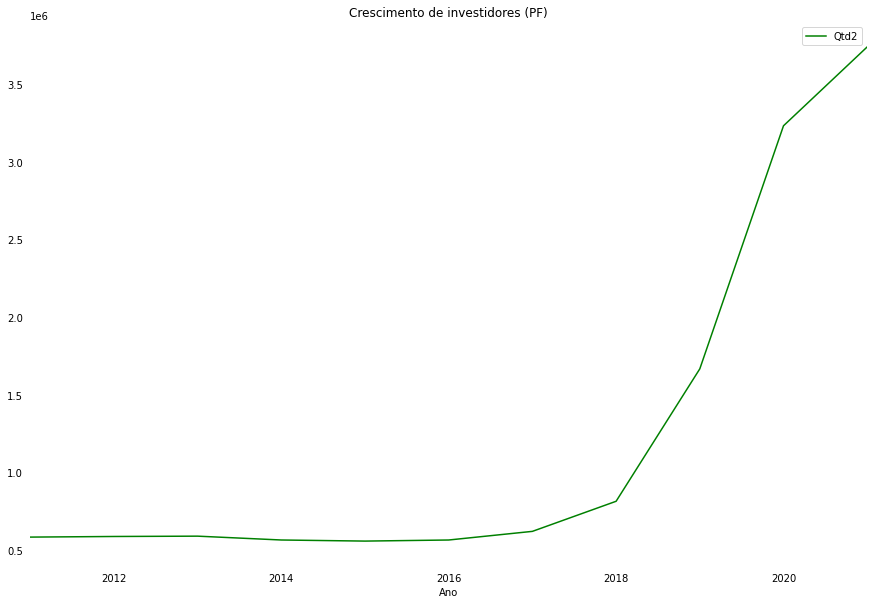

In [603]:
rc_params = {'axes.spines.top': False,
              'axes.spines.right': False,
              'axes.spines.bottom':False,
              'axes.spines.left':False,
              'xtick.bottom':False,
               'ytick.left':False}

with plt.rc_context(rc_params):
  fig, ax = plt.subplots(nrows=1, ncols=0, figsize=(20, 15)) 



  data_serie.plot(figsize=(15,10), color='green')
  plt.title('Crescimento de investidores (PF)')



**Até 2016 a quantidade de pessoas interessadas se manteve constante, em 2017-2018 sofreu um crescimento normal, já em 2018-2019 o número de novos investidores dobrou e a mesma proporção ocorreu em 2020.** 

- Até que ponto esse crescimento abrupto é saúdavel?